In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv("D:\Study\DS\Video_Games_Sales.csv")

In [175]:
df.isnull().sum()

Name               2
Platform           0
Year_of_Release    0
Genre              2
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [157]:
df['User_Score']=df['User_Score'].replace('tbd',0)

In [185]:
df['User_Score']=df['User_Score'].replace('8.4',8.4)

In [166]:
df['Year_of_Release']=df['Year_of_Release'].fillna(method='bfill')

In [168]:
df['Year_of_Release']=df['Year_of_Release'].astype(int)

In [174]:
df['User_Score']=df['User_Score'].fillna(method='ffill')

In [171]:
df['User_Score']=df['User_Score'].fillna(method='bfill')

In [186]:
df['User_Score']=df['User_Score'].astype(int)

ValueError: invalid literal for int() with base 10: '8.6'

In [184]:
df['User_Score']

0          8
1        8.3
2        8.3
3          8
4        8.5
        ... 
16714      0
16715      0
16716      0
16717      0
16718      0
Name: User_Score, Length: 16719, dtype: object

In [158]:
df['User_Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16719 entries, 0 to 16718
Series name: User_Score
Non-Null Count  Dtype 
--------------  ----- 
10015 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


In [129]:
df['User_Score'].mode()

0    tbd
Name: User_Score, dtype: object

In [151]:
cc_mean=round(df['Critic_Count'].mean(),2)
cs_mean=round(df['Critic_Score'].mean(),2)
uc_mean=round(df['User_Count'].mean(),2)
#us_mean=df['User_Score'].mean()
rt_mode=df["Rating"].mode()
dev_mode=df['Developer'].mode()
pub_mode=df['Publisher'].mode()

print(cc_mean)
print(cs_mean)
print(uc_mean)
print(rt_mode)
print(dev_mode)
print(pub_mode)

26.36
68.97
162.23
0    E
Name: Rating, dtype: object
0    Ubisoft
Name: Developer, dtype: object
0    Electronic Arts
Name: Publisher, dtype: object


In [152]:
df['Critic_Count']=df['Critic_Count'].fillna(cc_mean)
df['Critic_Score']=df['Critic_Score'].fillna(cs_mean)
df['User_Count']=df['User_Count'].fillna(uc_mean)
# df['Rating']=df['Rating'].fillna(rt_mode)
# df['Developer']=df['Developer'].fillna(dev_mode)
# df['Publisher']=df['Publisher'].fillna(pub_mode)

In [155]:
df['Rating']=df['Rating'].fillna(method='ffill')
df['Developer']=df['Developer'].fillna(method='ffill')
df['Publisher']=df['Publisher'].fillna(method='ffill')

In [181]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.480352,0.263330,0.145025,0.077602,0.047332,0.533543,68.968870,26.360400,162.229958
std,5.895577,0.813514,0.503283,0.308818,0.186710,1.547935,9.723417,13.241001,378.165132
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.970000,22.000000,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.970000,26.360000,162.230000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360000,162.230000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [182]:
df['Global_Sales'].corr(df['Critic_Score'])

0.20096442818426127

In [183]:
df['Global_Sales'].corr(df['Critic_Count'])

0.2485479190107461

In [187]:
df['Global_Sales'].corr(df['User_Count'])

0.21635456428145075

In [188]:
df['Critic_Count'].skew()

1.6557160777672626

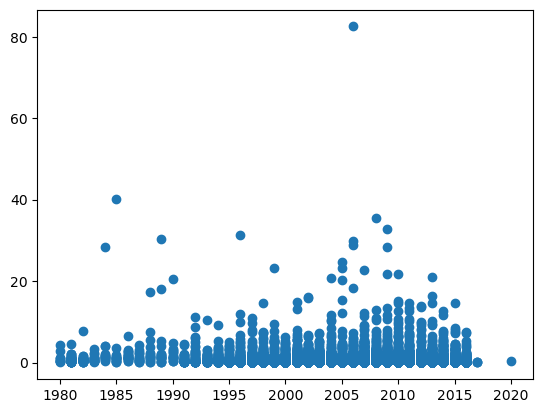

In [194]:
plt.scatter(x = 'Year_of_Release',y = 'Global_Sales', data=df)
plt.show()

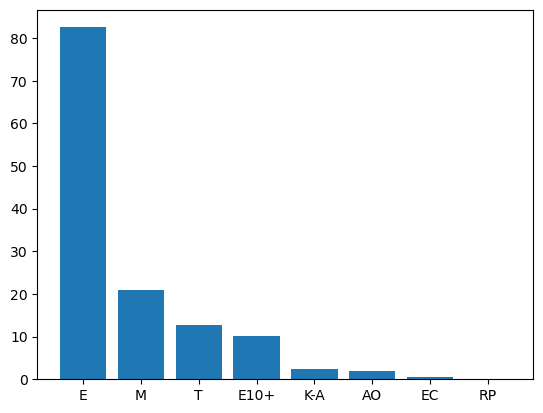

In [198]:
plt.bar(x = 'Rating',height = 'Global_Sales', data=df)
plt.show()

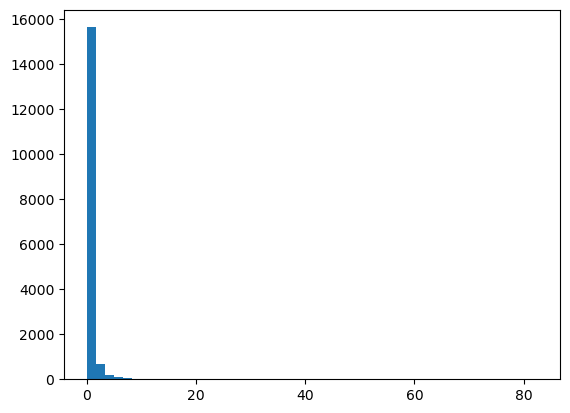

In [203]:
plt.hist(x = 'Global_Sales',bins=50, data=df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20897e22d10>,
 'caps': [<matplotlib.lines.Line2D at 0x20897e23250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20897e22b30>],
 'medians': [<matplotlib.lines.Line2D at 0x20897e23790>],
 'fliers': [<matplotlib.lines.Line2D at 0x20897e23af0>],
 'means': []}

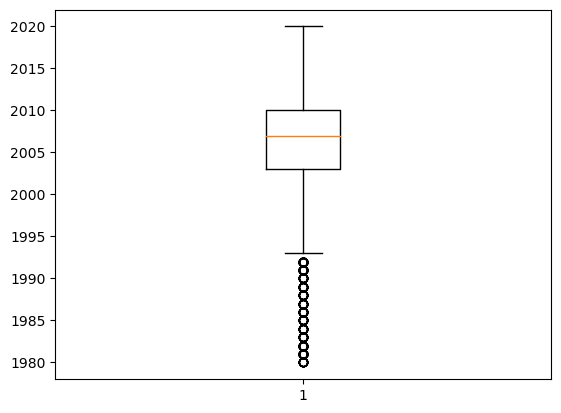

In [206]:
plt.boxplot(x='Year_of_Release', data=df)

In [204]:
sns.heatmap(df)

ValueError: could not convert string to float: 'Wii Sports'